#Lampiran

### Import Packages

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 7.5 MB/s 
     |████████████████████████████████| 9.5 MB 37.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm

### Data Preparation

In [ ]:
data=pd.read_csv('BNB_USD Binance Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 31, 2021",353.73,323.46,353.73,311.26,4.11M,8.65%
1,"May 30, 2021",325.58,305.30,333.93,297.20,3.74M,6.83%
2,"May 29, 2021",304.77,328.97,342.49,299.37,3.76M,-7.46%
3,"May 28, 2021",329.33,369.90,369.90,319.62,5.25M,-10.36%
4,"May 27, 2021",367.39,378.11,383.60,347.67,4.28M,-3.11%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      120 non-null    object 
 1   Price     120 non-null    float64
 2   Open      120 non-null    float64
 3   High      120 non-null    float64
 4   Low       120 non-null    float64
 5   Vol.      120 non-null    object 
 6   Change %  120 non-null    object 
dtypes: float64(4), object(3)
memory usage: 6.7+ KB


Mengubah tipe data

In [ ]:
data=data[['Date','Price']]
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    120 non-null    datetime64[ns]
 1   Price   120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [ ]:
data.sort_values(by='Date',ascending=True,inplace=True,ignore_index=True)
data.head()

,Date,Price
0,2021-02-01,51.41
1,2021-02-02,50.99
2,2021-02-03,52.12
3,2021-02-04,55.92
4,2021-02-05,67.76


Plotting data

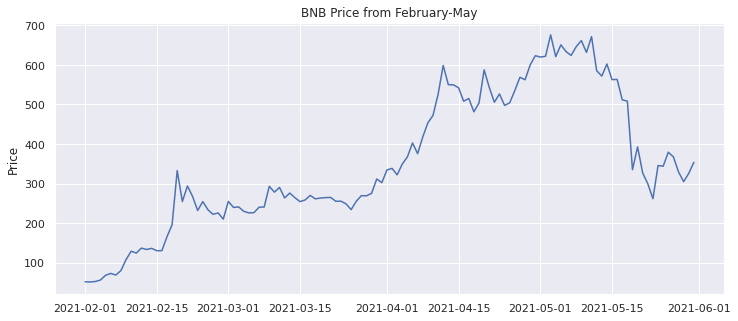

In [ ]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(12,5))
plt.title('BNB Price from February-May')
plt.ylabel('Price')
plt.plot(data['Date'],data['Price'])

Copying data for manipulate the index with Date

In [ ]:
data2=data.copy()
data2.head()

,Date,Price
0,2021-02-01,51.41
1,2021-02-02,50.99
2,2021-02-03,52.12
3,2021-02-04,55.92
4,2021-02-05,67.76


Decomposing Data

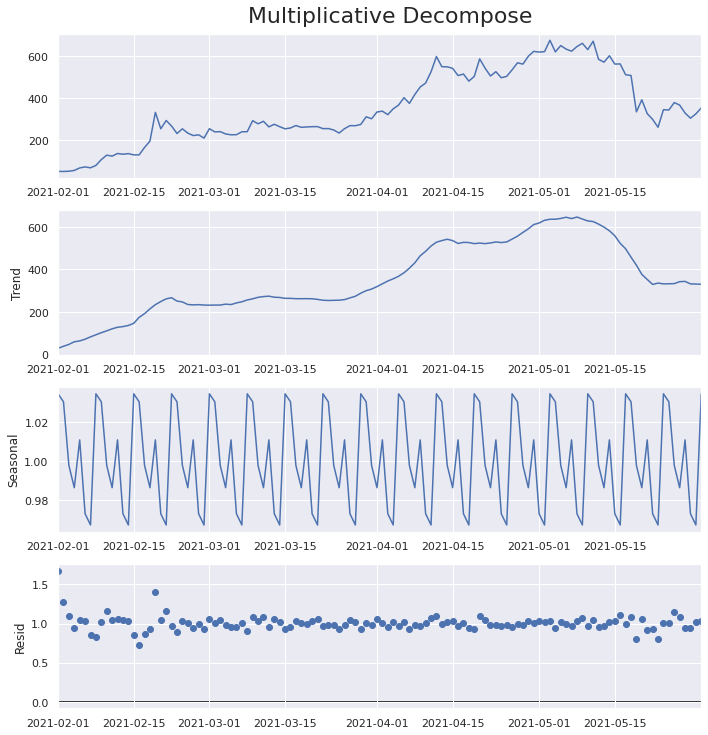

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition 
result_mul = seasonal_decompose(data2.set_index(['Date']), model='multiplicative', extrapolate_trend='freq')
# Additive Decomposition

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22, x=0.55,y=1.02)
plt.show()

In [ ]:
multi = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
multi.columns = ['seas', 'trend', 'resid', 'actual_values']
multi.head()

,seas,trend,resid,actual_values
Date,,,,
2021-02-01,1.034186,29.645408,1.676839,51.41
2021-02-02,1.030106,38.637398,1.281136,50.99
2021-02-03,0.997776,47.629388,1.096722,52.12
2021-02-04,0.986454,59.881429,0.946669,55.92
2021-02-05,1.010760,63.927143,1.048673,67.76


In [ ]:
multi.describe()

,seas,trend,resid,actual_values
count,120.000000,120.000000,120.000000,120.000000
mean,1.000285,353.429702,1.006871,353.974833
std,0.024556,169.596057,0.102631,172.662038
min,0.967503,29.645408,0.722852,50.990000
25%,0.973215,247.460714,0.959214,240.790000
50%,0.997776,324.060714,1.004459,308.090000
75%,1.030106,523.565357,1.037617,512.617500
max,1.034186,645.707143,1.676839,676.120000


Uji stasioner mean

In [ ]:
result = adfuller(data2.Price)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.843770
p-value: 0.358958


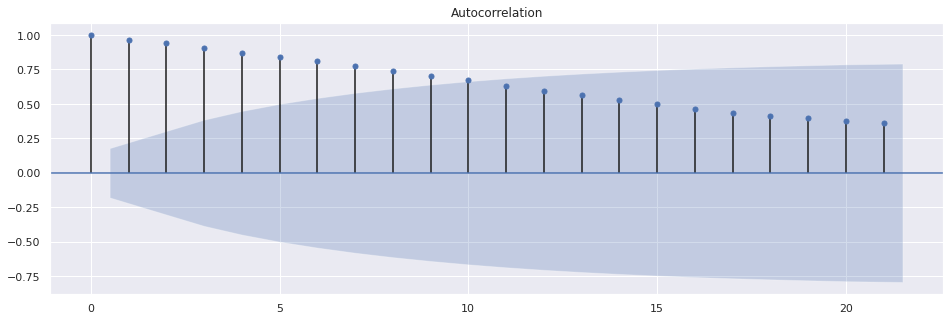

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
ax.set_title('ACF before differencing')
plot_acf(data2.Price,ax=ax)
plt.show()

Differencing 1 x

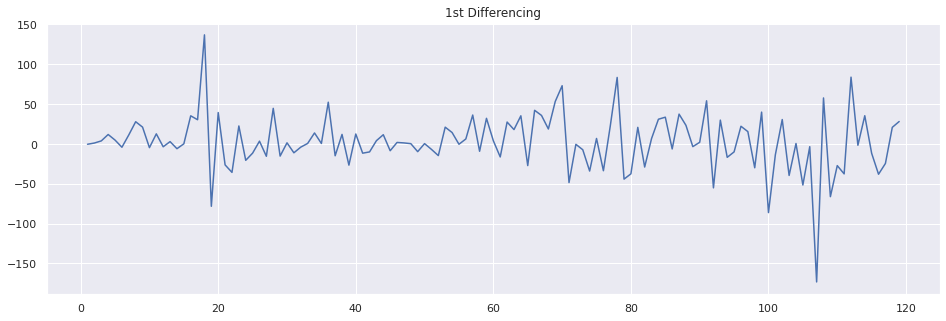

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(data2.Price.diff())
ax.set_title('1st Differencing')
plt.show()

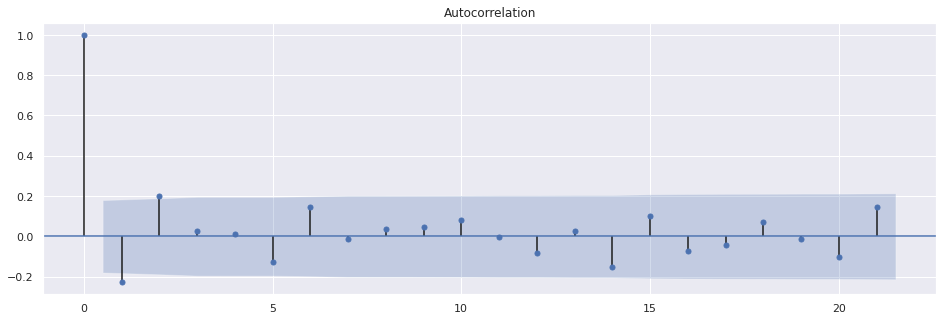

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
plot_acf(data2.Price.diff().dropna(), ax=ax)
plt.show()

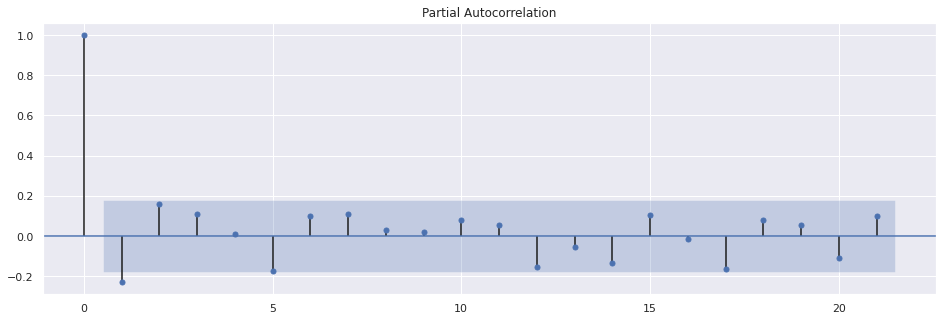

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
plot_pacf(data2.Price.diff().dropna(),ax=ax)
plt.show()

Uji stasioner mean setelah differencing 1x

In [ ]:
result2 = adfuller(data2.Price.diff().dropna())
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])

ADF Statistic: -7.099549
p-value: 0.000000


Uji stasioner varians

In [ ]:
import random
sample1=[]
sample2=[]
sample3=[]
for i in range(30):
  sample1.append(random.sample(list(data2.Price.diff().dropna()),10))
  sample2.append(random.sample(list(data2.Price.diff().dropna()),10))
  sample3.append(random.sample(list(data2.Price.diff().dropna()),10))

In [ ]:
from scipy.stats import bartlett
result=0
for i in range(30):
  result+=bartlett(sample1[i],sample2[i],sample3[i])[1]
result/30

0.3378573249837375

Karena lebih besar dari p value(0.05) maka data sudah stasioner varians

### Pembentukan Model

Pembentukan model ARIMA secara manual

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

basemodel = ARIMA(data2.Price, order=(2,1,1))
basemodel_fit = basemodel.fit(disp=0)
print(basemodel_fit.summary())


#ngapus warning arima yang katanya mau diapus setelah 0.12 release
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  119
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -590.298
Method:                       css-mle   S.D. of innovations             34.503
Date:                Fri, 20 Aug 2021   AIC                           1190.597
Time:                        11:48:48   BIC                           1204.492
Sample:                             1   HQIC                          1196.239
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5628      3.371      0.760      0.447      -4.043       9.169
ar.L1.D.Price     0.1550      0.352      0.440      0.660      -0.535       0.845
ar.L2.D.Price     0.2417      0.104     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

Pembagian data menjadi data train dan test

In [ ]:
0.90*len(data2.Price)

108.0

In [ ]:
#train buat forecast
train_fc=pd.DataFrame(data2.Price[:108])
test_fc=pd.DataFrame(data2.Price[108:])

Pembentukan model ARIMA secara otomatis melalui data train

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = pm.auto_arima(train_fc.Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1069.219, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1069.812, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1067.872, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1068.971, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1068.416, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1068.007, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1068.578, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1066.992, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1066.674, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1065.033, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1066.961, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1066.776, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1066.787, Time=0.09 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 1.070 seconds


In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -528.516
Date:                Fri, 20 Aug 2021   AIC                           1065.033
Time:                        11:49:15   BIC                           1075.724
Sample:                             0   HQIC                          1069.367
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1826      0.089     -2.046      0.041      -0.358      -0.008
ar.L2          0.2055      0.097      2.126      0.033       0.016       0.395
ar.L3          0.2064      0.141      1.464      0.1

Plot residual dari model terbaik

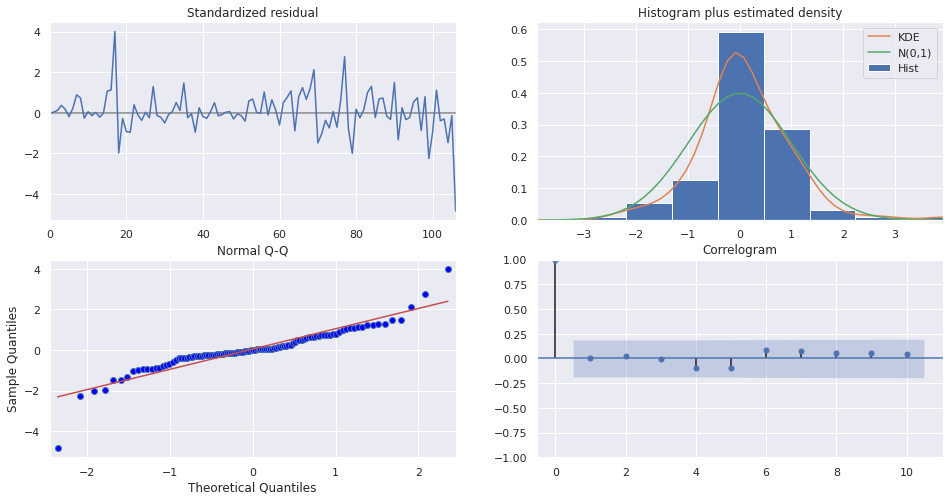

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

Forecasting dengan model terbaik terhadap data test

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


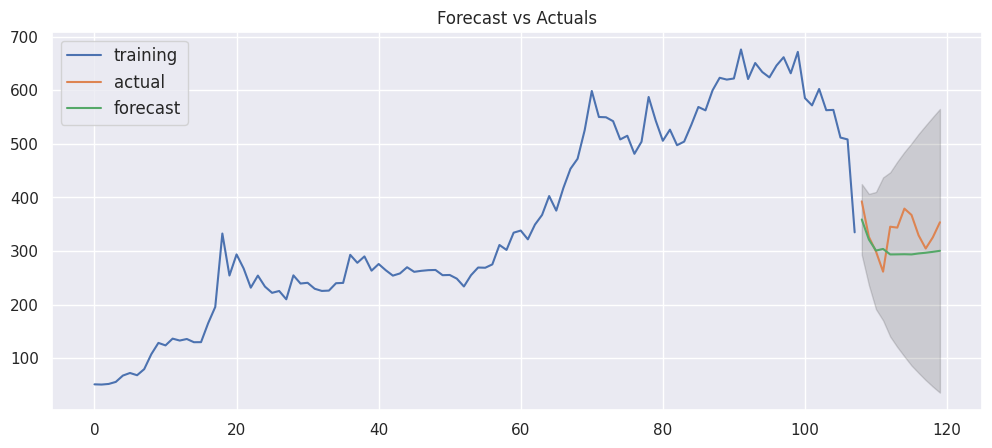

In [ ]:
bestmodel = ARIMA(train_fc, order=(3, 1, 0))  
fitted = bestmodel.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_fc.index)
lower_series = pd.Series(conf[:, 0], index=test_fc.index)
upper_series = pd.Series(conf[:, 1], index=test_fc.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_fc, label='training')
plt.plot(test_fc, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()

Perbandingan hasil forecast terhadap data test

In [ ]:
testing=test_fc.reset_index()
testing.drop(columns=['index'],inplace=True)

In [ ]:
result1=pd.DataFrame(fc,columns=['Predicted'])
result1['Actual']=testing['Price']
result1

,Predicted,Actual
0,358.920755,392.72
1,321.617858,326.47
2,300.940011,299.23
3,304.013998,261.61
4,293.727094,345.46
5,293.885195,343.78
6,294.125875,379.20
7,293.751840,367.39
8,295.567731,329.33
9,296.862035,304.77


Perhitungan MAPE forecasting model terbaik

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape,'mae': mae, 
             'rmse':rmse, 
            'corr':corr})

In [ ]:
forecast_accuracy(fc, test_fc.Price)

{'corr': 0.3185653610493968,
 'mae': 38.751046627043834,
 'mape': 0.11252541537025033,
 'rmse': 46.149685455592156}

Forecasting harga BNB Coin pada 1 Juni-7 Juni 2021

In [ ]:
actual_BNB=pd.read_csv('BNB_Actual.csv')
actual_BNB=actual_BNB[['Date','Price']]
actual_BNB['Date']=pd.to_datetime(actual_BNB['Date'])
actual_BNB.sort_values(by='Date',ascending=True,ignore_index=True,inplace=True)
actual_BNB.set_index(np.arange(121,128),inplace=True)
actual_BNB.head()

,Date,Price
121,2021-06-01,362.37
122,2021-06-02,401.10
123,2021-06-03,427.55
124,2021-06-04,390.62
125,2021-06-05,390.10


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


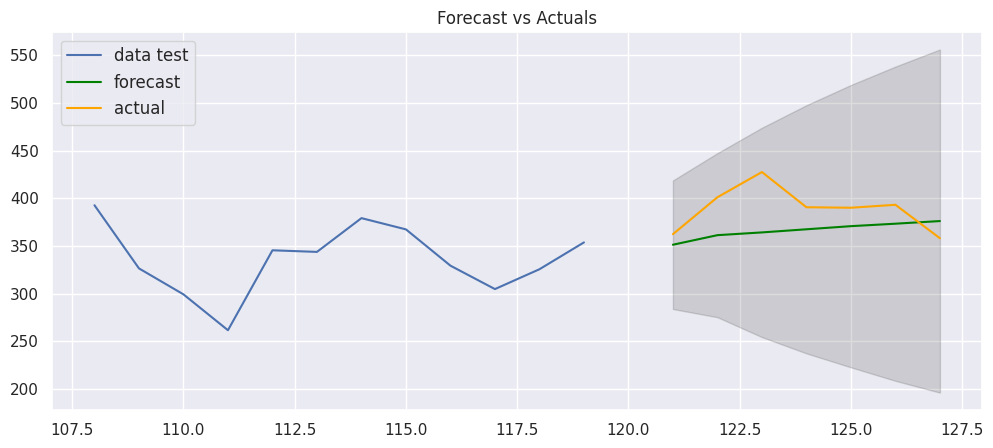

In [ ]:
bestmodel = ARIMA(data2['Price'], order=(3, 1, 0))  
fitted = bestmodel.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(7, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_ar = pd.Series(fc, index=np.arange(121, 128))
lower_series = pd.Series(conf[:, 0], index=np.arange(121, 128))
upper_series = pd.Series(conf[:, 1], index=np.arange(121, 128))

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_fc, label='data test')
plt.plot(fc_series_ar, label='forecast',color='green')
plt.plot(actual_BNB['Price'],label='actual',color='orange')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()

**Perbandingan** harga BNB sebenarnya dan hasil forecasting pada tanggal 1-7 Juni 2021

In [ ]:
actual_BNB['forecast_ARIMA']=fc_series_ar
actual_BNB

,Date,Price,forecast_ARIMA
121,2021-06-01,362.37,351.295585
122,2021-06-02,401.10,361.336569
123,2021-06-03,427.55,364.215161
124,2021-06-04,390.62,367.499052
125,2021-06-05,390.10,370.776278
126,2021-06-06,393.20,373.361017
127,2021-06-07,358.11,376.131518


In [ ]:
ARIMA_BNB=forecast_accuracy(fc, actual_BNB.Price)
ARIMA_BNB

{'corr': -0.0067922479959673775,
 'mae': 27.782550758565215,
 'mape': 0.06961946054793393,
 'rmse': 32.38478411862792}

### Model SARIMA

Perbandingan differencing biasa dengan differencing seasonal

Pembentukan model SARIMA secara otomatis

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train_fc, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=14,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[14]             : AIC=960.835, Time=0.70 sec
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=999.043, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=967.486, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=960.626, Time=0.41 sec
 ARIMA(0,1,1)(0,1,0)[14]             : AIC=997.928, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[14]             : AIC=959.828, Time=0.57 sec
 ARIMA(0,1,1)(1,1,0)[14]             : AIC=968.488, Time=0.19 sec
 ARIMA(0,1,1)(2,1,1)[14]             : AIC=960.622, Time=1.77 sec
 ARIMA(0,1,1)(1,1,2)[14]             : AIC=inf, Time=2.33 sec
 ARIMA(0,1,1)(0,1,2)[14]             : AIC=959.424, Time=0.86 sec
 ARIMA(0,1,0)(0,1,2)[14]             : AIC=959.144, Time=0.63 sec
 ARIMA(0,1,0)(0,1,1)[14]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(1,1,2)[14]             : AIC=961.143, Time=2.13 sec
 ARIMA(0,1,0)(1,1,1)[14]             : AIC=959.604, Time=0.56 sec
 ARIMA(1,1,0)(0,1,2)[14]             : AI

In [ ]:
print(smodel.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  108
Model:             SARIMAX(3, 1, 0)x(0, 1, [1, 2], 14)   Log Likelihood                -471.766
Date:                                 Fri, 20 Aug 2021   AIC                            955.532
Time:                                         11:52:59   BIC                            970.727
Sample:                                              0   HQIC                           961.667
                                                 - 108                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1541      0.110     -1.400      0.162      -0.370       0

Plot residual model SARIMA

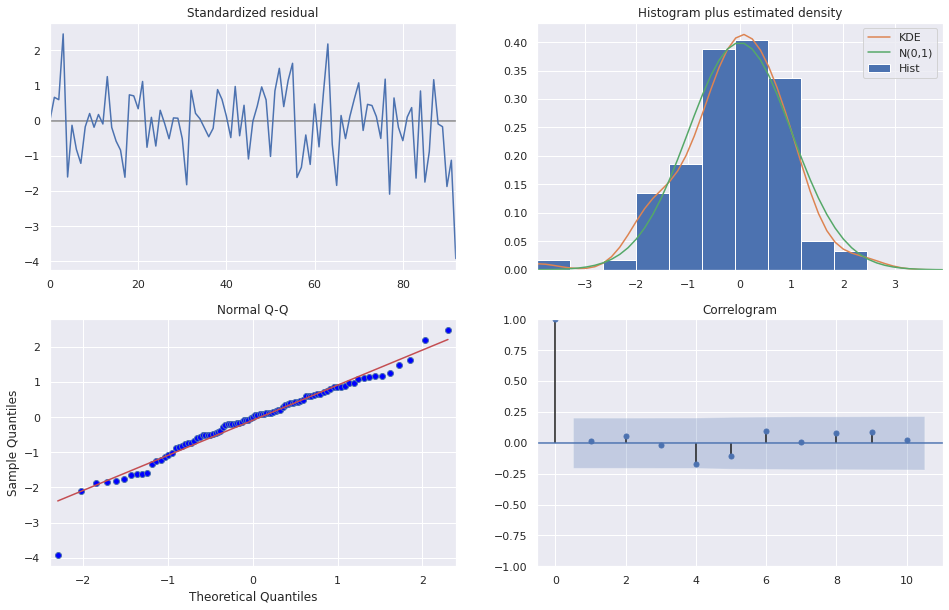

In [ ]:
smodel.plot_diagnostics(figsize=(16,10))
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Forecasting model SARIMA terhadap data test

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


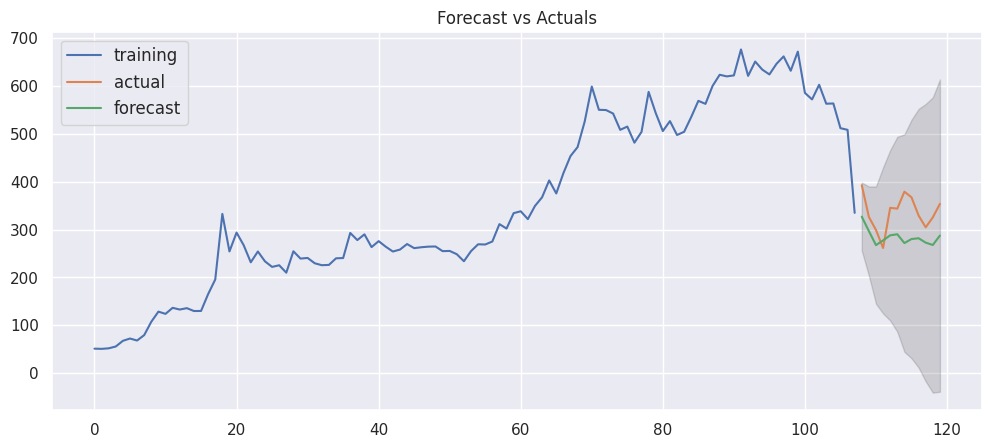

In [ ]:
smodel=SARIMAX(train_fc,order=(3,1,0),seasonal_order=(0,1,[1,2],14))
fitted_smodel=smodel.fit(disp=-1)
fc= fitted_smodel.forecast(12, alpha=0.05)  # 95% conf
con1=fitted_smodel.get_forecast(12).summary_frame()
# Make as pandas series
fc_series = pd.Series(fc, index=test_fc.index)
lower_series = pd.Series(con1['mean_ci_lower'])
upper_series = pd.Series(con1['mean_ci_upper'])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_fc, label='training')
plt.plot(test_fc, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
fc_series=pd.DataFrame(fc_series)
fc_series.reset_index(inplace=True)
fc_series.drop(columns=['index'],inplace=True)

In [ ]:
testing2=test_fc.reset_index()
testing2.drop(columns=['index'],inplace=True)

result2=pd.DataFrame(fc_series)
result2['Actual']=testing2['Price']
result2.columns=[['Forecasted','Actual']]
result2

,Forecasted,Actual
0,327.004343,392.72
1,296.890435,326.47
2,267.616919,299.23
3,277.402085,261.61
4,288.041221,345.46
5,290.256996,343.78
6,271.875824,379.20
7,280.306465,367.39
8,281.939174,329.33
9,272.754123,304.77


In [ ]:
forecast_accuracy(fc, test_fc.Price)

{'corr': 0.525760417516998,
 'mae': 54.27933694651832,
 'mape': 0.15660203108076443,
 'rmse': 59.6431394152551}

Forecasting harga BNB Coin pada 1-7 Juni 2021 dengan model SARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


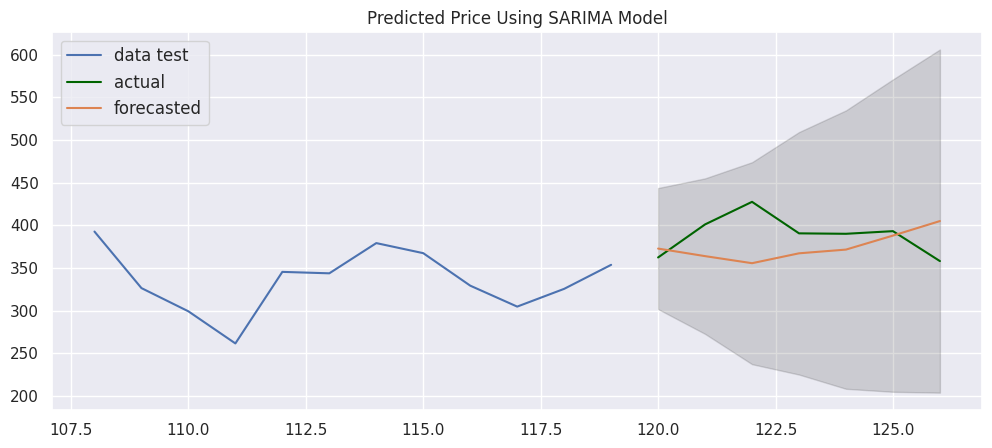

In [ ]:
# Forecast
smodel=SARIMAX(data2['Price'],order=(3,1,0),seasonal_order=(0,1,[1,2],14))
fitted2 = smodel.fit(disp=-1)  
fcs= fitted2.forecast(7,alpha=0.05)  # 95% conf
con=fitted2.get_forecast(7).summary_frame()

# make series for plotting purpose

fitted_series = pd.Series(fcs[:], index=np.arange(120, 127))
lower_series = pd.Series(con['mean_ci_lower'],index=np.arange(120, 127))
upper_series = pd.Series(con['mean_ci_upper'],index=np.arange(120, 127))

# Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(test_fc,label='data test')
plt.plot(actual_BNB.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
plt.plot(fitted_series, label='forecasted')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.legend(loc='upper left', fontsize=12)
plt.title("Predicted Price Using SARIMA Model")
plt.show()

In [ ]:
#harga 7 hari kedepan
result3=pd.DataFrame(fcs)
result3.set_index(np.arange(121,128),inplace=True)

In [ ]:
actual_BNB['forecasted_SARIMA']=result3['predicted_mean']
actual_BNB

,Date,Price,forecast_ARIMA,forecasted_SARIMA
121,2021-06-01,362.37,351.295585,372.780155
122,2021-06-02,401.10,361.336569,363.919550
123,2021-06-03,427.55,364.215161,355.640512
124,2021-06-04,390.62,367.499052,367.220531
125,2021-06-05,390.10,370.776278,371.589666
126,2021-06-06,393.20,373.361017,387.993328
127,2021-06-07,358.11,376.131518,405.027739


In [ ]:
SARIMA_BNB=forecast_accuracy(fcs, actual_BNB.Price)
SARIMA_BNB

{'corr': -0.7322609495539979,
 'mae': 23.38387533180483,
 'mape': 0.057152932582591,
 'rmse': 32.18461856849482}

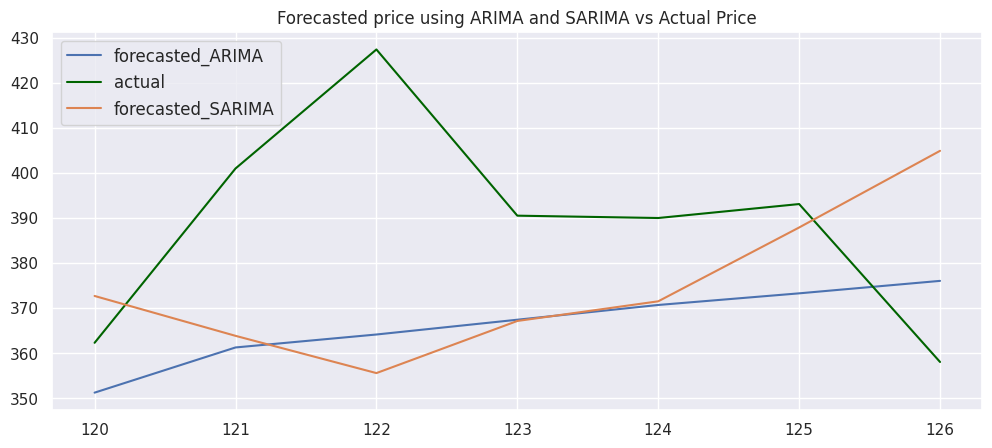

In [ ]:
# Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(pd.DataFrame(fc_series_ar).set_index(np.arange(120,127)),label='forecasted_ARIMA')
plt.plot(actual_BNB.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
plt.plot(fitted_series, label='forecasted_SARIMA')

plt.legend(loc='upper left', fontsize=12)
plt.title("Forecasted price using ARIMA and SARIMA vs Actual Price")
plt.show()

##**ETHEREUM**

In [ ]:
data_eth=pd.read_excel('ETH_USD Binance Historical Data.xlsx')
data_eth.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 31, 2021",2710.07,2374.52,2710.07,2292.67,1.31M,13.54%
1,"May 30, 2021",2386.93,2278.24,2456.69,2216.60,1.15M,4.92%
2,"May 29, 2021",2275.00,2412.17,2540.25,2220.31,1.38M,-5.91%
3,"May 28, 2021",2418.02,2734.03,2734.03,2369.20,1.55M,-11.85%
4,"May 27, 2021",2743.08,2881.05,2881.05,2666.95,1.10M,-4.92%


In [ ]:
data_eth=data_eth[['Date','Price']]
data_eth['Date']=pd.to_datetime(data_eth['Date'])
data_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    120 non-null    datetime64[ns]
 1   Price   120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [ ]:
data_eth.sort_values(by='Date',ascending=True,inplace=True,ignore_index=True)
data_eth.head()

,Date,Price
0,2021-02-01,1373.00
1,2021-02-02,1511.00
2,2021-02-03,1664.55
3,2021-02-04,1597.42
4,2021-02-05,1719.33


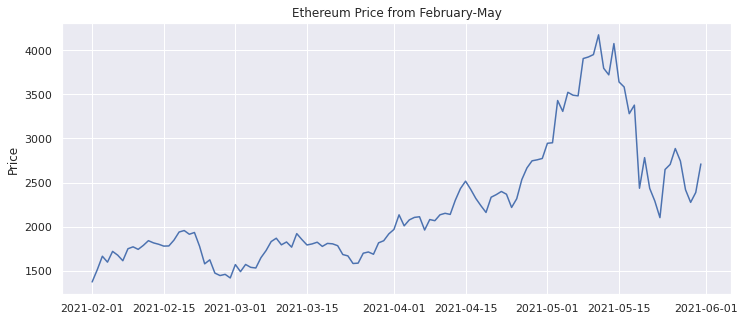

In [ ]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(12,5))
plt.title('Ethereum Price from February-May')
plt.ylabel('Price')
plt.plot(data_eth['Date'],data_eth['Price'])

In [ ]:
data2_eth=data_eth.copy()
data2_eth.head()

,Date,Price
0,2021-02-01,1373.00
1,2021-02-02,1511.00
2,2021-02-03,1664.55
3,2021-02-04,1597.42
4,2021-02-05,1719.33


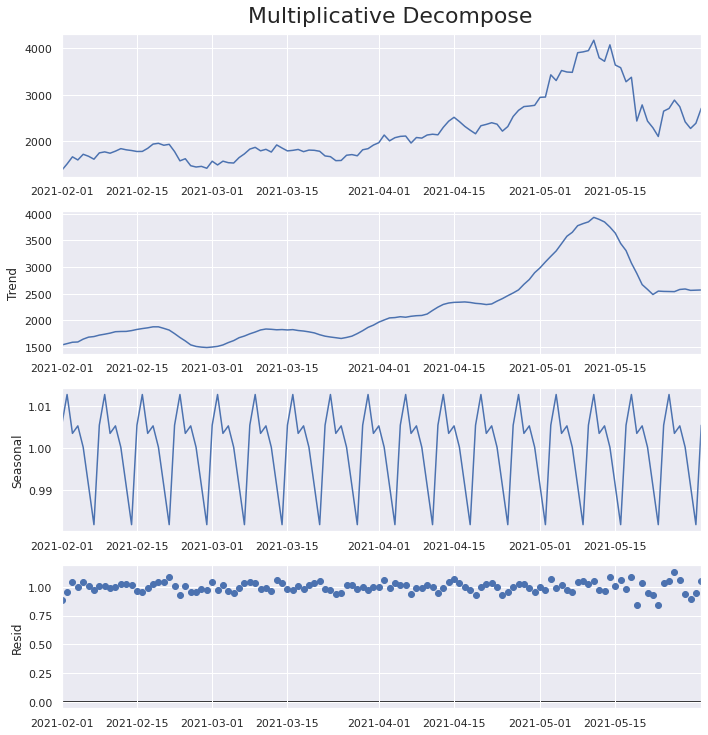

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition 
result_mul = seasonal_decompose(data2_eth.set_index(['Date']), model='multiplicative', extrapolate_trend='freq')
# Additive Decomposition

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22, x=0.55,y=1.02)
plt.show()

In [ ]:
multi = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
multi.columns = ['seas', 'trend', 'resid', 'actual_values']
multi.head()

,seas,trend,resid,actual_values
Date,,,,
2021-02-01,1.005484,1537.132041,0.888350,1373.00
2021-02-02,1.012830,1562.929796,0.954527,1511.00
2021-02-03,1.003524,1588.727551,1.044046,1664.55
2021-02-04,1.005322,1593.582857,0.997101,1597.42
2021-02-05,1.000203,1647.324286,1.043499,1719.33


In [ ]:
multi.describe()

,seas,trend,resid,actual_values
count,120.000000,120.000000,120.000000,120.000000
mean,1.000046,2230.543338,0.997992,2228.821833
std,0.009671,659.474992,0.046397,682.214128
min,0.981681,1489.630000,0.839905,1373.000000
25%,0.990956,1749.725357,0.970271,1770.072500
50%,1.003524,1986.470714,0.999185,1964.730000
75%,1.005484,2552.751339,1.032343,2455.027500
max,1.012830,3934.324286,1.132142,4173.450000


In [ ]:
result = adfuller(data2_eth.Price)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.414697
p-value: 0.575210


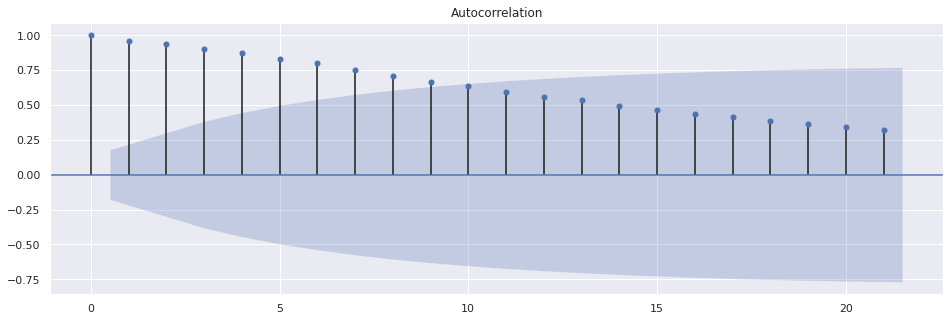

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
ax.set_title('ACF before differencing')
plot_acf(data2_eth.Price,ax=ax)
plt.show()

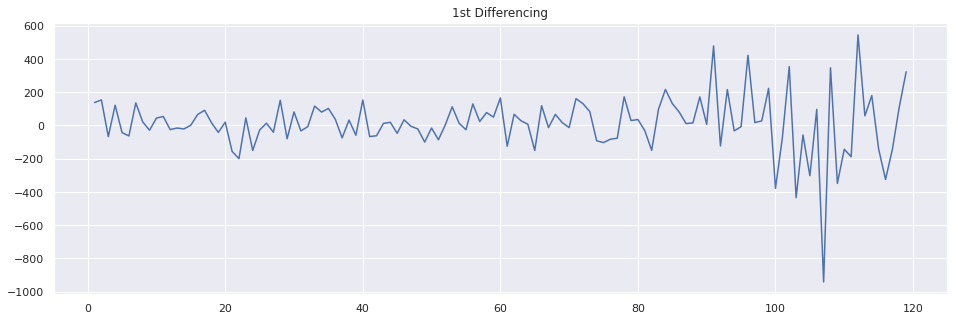

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(data2_eth.Price.diff())
ax.set_title('1st Differencing')
plt.show()

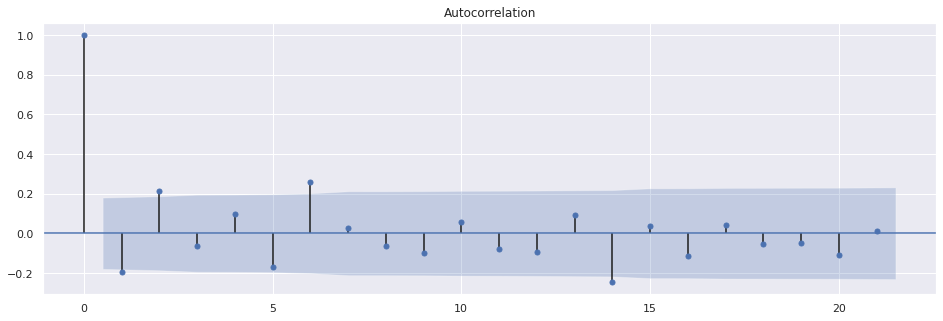

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
plot_acf(data2_eth.Price.diff().dropna(), ax=ax)
plt.show()

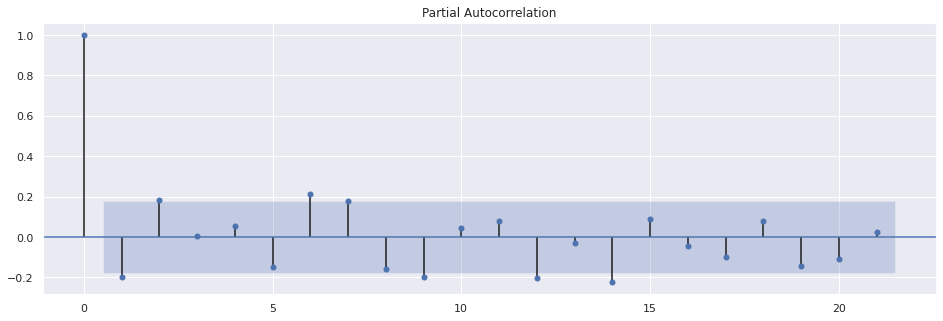

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
plot_pacf(data2_eth.Price.diff().dropna(),ax=ax)
plt.show()

In [ ]:
result2 = adfuller(data2_eth.Price.diff().dropna())
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])

ADF Statistic: -3.919595
p-value: 0.001895


In [ ]:
import random
sample1=[]
sample2=[]
sample3=[]
for i in range(30):
  sample1.append(random.sample(list(data2_eth.Price.diff().dropna()),10))
  sample2.append(random.sample(list(data2_eth.Price.diff().dropna()),10))
  sample3.append(random.sample(list(data2_eth.Price.diff().dropna()),10))

In [ ]:
from scipy.stats import bartlett
result=0
for i in range(30):
  result+=bartlett(sample1[i],sample2[i],sample3[i])[1]
result/30

0.29122413894173865

Karena lebih besar dari p value(0.05) maka data sudah stasioner varians

### Pembentukan Model

Tentative model ARIMA nya adalah ARIMA(2,1,2)

In [ ]:
train_fc_eth=pd.DataFrame(data2_eth.Price[:108])
test_fc_eth=pd.DataFrame(data2_eth.Price[108:])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_eth = pm.auto_arima(train_fc_eth.Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1373.461, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1448.563, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1396.548, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1384.145, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1446.789, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1374.776, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1374.713, Time=0.26 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1372.761, Time=0.13 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=1374.761, Time=0.23 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=1376.393, Time=0.34 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1371.782, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1383.019, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1373.700, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1373.781, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]          

In [ ]:
print(model_eth.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -682.891
Date:                Fri, 20 Aug 2021   AIC                           1371.782
Time:                        08:09:19   BIC                           1379.772
Sample:                             0   HQIC                          1375.020
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1409      0.087    -13.167      0.000      -1.311      -0.971
ma.L2          0.4073      0.087      4.704      0.000       0.238       0.577
sigma2      2.272e+04   2292.836      9.908      0.0

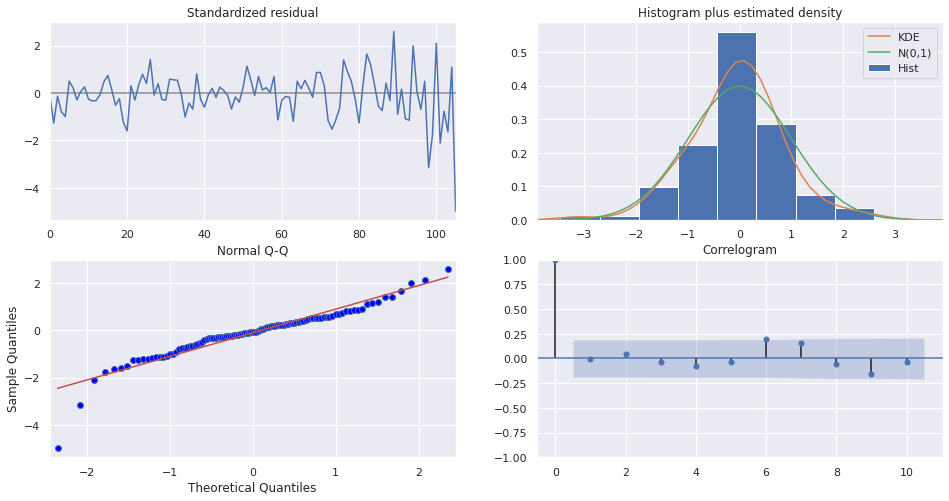

In [ ]:
model_eth.plot_diagnostics(figsize=(16,8))
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


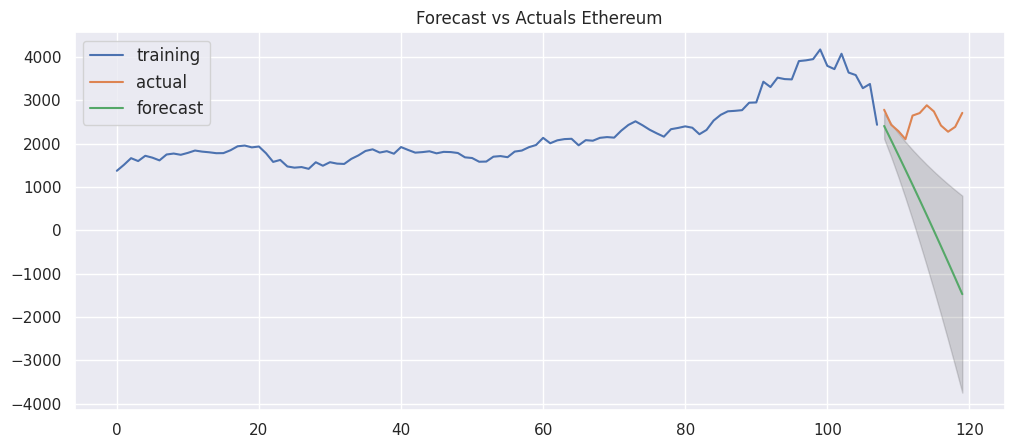

In [ ]:
bestmodel_eth = ARIMA(train_fc_eth, order=(0, 2, 2))  
fitted_eth = bestmodel_eth.fit(disp=-1)  

# Forecast
fc_eth, se, conf = fitted_eth.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_eth = pd.Series(fc_eth, index=test_fc_eth.index)
lower_series = pd.Series(conf[:, 0], index=test_fc_eth.index)
upper_series = pd.Series(conf[:, 1], index=test_fc_eth.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_fc_eth, label='training')
plt.plot(test_fc_eth, label='actual')
plt.plot(fc_series_eth, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals Ethereum')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
testing_eth=test_fc_eth.reset_index()
testing_eth.drop(columns=['index'],inplace=True)

In [ ]:
result1_eth=pd.DataFrame(fc_eth,columns=['Predicted'])
result1_eth['Actual']=testing_eth['Price']
result1_eth

,Predicted,Actual
0,2407.594757,2782.00
1,2073.986093,2433.20
2,1736.513002,2289.94
3,1395.175486,2101.89
4,1049.973545,2647.35
5,700.907177,2705.20
6,347.976385,2885.06
7,-8.818834,2743.08
8,-369.478478,2418.02
9,-734.002548,2275.00


In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape,'mae': mae, 
             'rmse':rmse, 
            'corr':corr})

In [ ]:
forecast_accuracy(fc_eth, test_fc_eth.Price)

{'corr': -0.037525408501392035,
 'mae': 2029.5790353421155,
 'mape': 0.7973691594057267,
 'rmse': 2383.361052932111}

Mape best model hasil forecast terhadap data test adalah 79%

In [ ]:
actual_ETH=pd.read_excel('ETH_Actual.xlsx')
actual_ETH=actual_ETH[['Date','Price']]
actual_ETH['Date']=pd.to_datetime(actual_ETH['Date'])
actual_ETH.sort_values(by='Date',ascending=True,ignore_index=True,inplace=True)
actual_ETH.set_index(np.arange(121,128),inplace=True)
actual_ETH.head()

,Date,Price
121,2021-06-01,2633.59
122,2021-06-02,2704.73
123,2021-06-03,2853.36
124,2021-06-04,2687.89
125,2021-06-05,2629.00


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


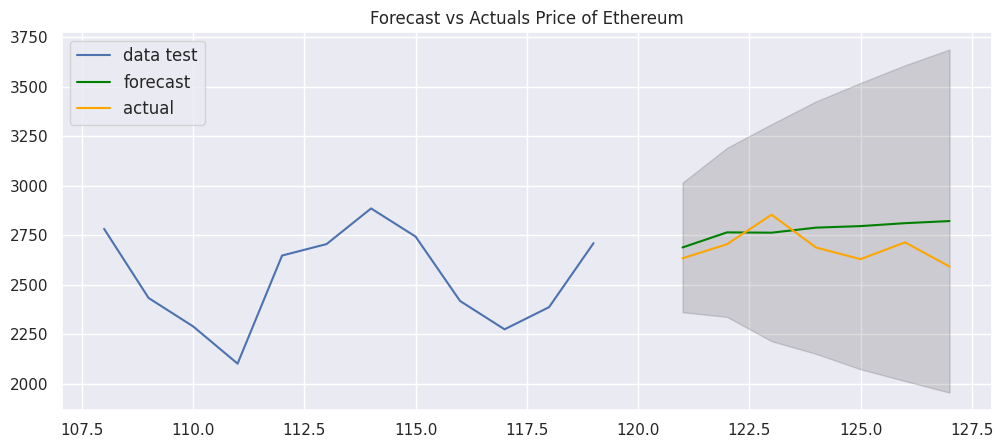

In [ ]:
bestmodel_eth = ARIMA(data2_eth['Price'], order=(3, 1, 0))  
fitted_eth = bestmodel_eth.fit(disp=-1)  

# Forecast
fc_eth, se, conf = fitted_eth.forecast(7, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_ar_eth = pd.Series(fc_eth, index=np.arange(121, 128))
lower_series = pd.Series(conf[:, 0], index=np.arange(121, 128))
upper_series = pd.Series(conf[:, 1], index=np.arange(121, 128))

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_fc_eth, label='data test')
plt.plot(fc_series_ar_eth, label='forecast',color='green')
plt.plot(actual_ETH['Price'],label='actual',color='orange')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals Price of Ethereum')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
actual_ETH['forecast_ARIMA']=fc_series_ar_eth
actual_ETH

,Date,Price,forecast_ARIMA
121,2021-06-01,2633.59,2688.239766
122,2021-06-02,2704.73,2764.267266
123,2021-06-03,2853.36,2762.675488
124,2021-06-04,2687.89,2788.162566
125,2021-06-05,2629.00,2795.898908
126,2021-06-06,2713.91,2810.713156
127,2021-06-07,2591.78,2821.374303


In [ ]:
ARIMA_ETH=forecast_accuracy(fc_eth, actual_ETH.Price)
ARIMA_ETH

{'corr': -0.09937719085646907,
 'mae': 114.062925193131,
 'mape': 0.0427984173784817,
 'rmse': 128.03414250795475}

Mape hasil forecast ARIMA harga ETH 7 hari kedepan adalah 4%

### Model SARIMA

Pembentukan model SARIMA secara otomatis

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel_eth = pm.auto_arima(train_fc_eth, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=14,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[14]             : AIC=inf, Time=0.83 sec
 ARIMA(0,2,0)(0,1,0)[14]             : AIC=1328.090, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[14]             : AIC=1247.879, Time=0.26 sec
 ARIMA(0,2,1)(0,1,1)[14]             : AIC=inf, Time=0.55 sec
 ARIMA(1,2,0)(0,1,0)[14]             : AIC=1269.401, Time=0.05 sec
 ARIMA(1,2,0)(2,1,0)[14]             : AIC=1243.947, Time=0.62 sec
 ARIMA(1,2,0)(2,1,1)[14]             : AIC=1241.800, Time=2.57 sec
 ARIMA(1,2,0)(1,1,1)[14]             : AIC=1240.528, Time=0.70 sec
 ARIMA(1,2,0)(0,1,1)[14]             : AIC=1242.091, Time=0.63 sec
 ARIMA(1,2,0)(1,1,2)[14]             : AIC=1240.752, Time=2.11 sec
 ARIMA(1,2,0)(0,1,2)[14]             : AIC=1238.829, Time=1.57 sec
 ARIMA(0,2,0)(0,1,2)[14]             : AIC=inf, Time=0.93 sec
 ARIMA(2,2,0)(0,1,2)[14]             : AIC=1227.204, Time=1.07 sec
 ARIMA(2,2,0)(0,1,1)[14]             : AIC=inf, Time=0.91 sec
 ARIMA(2,2,0)(1,1,2)[14]             : 

In [ ]:
print(smodel_eth.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 2, 2)x(0, 1, 2, 14)   Log Likelihood                -602.038
Date:                            Fri, 20 Aug 2021   AIC                           1216.077
Time:                                    08:37:23   BIC                           1231.207
Sample:                                         0   HQIC                          1222.183
                                            - 108                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4644      0.204      2.281      0.023       0.065       0.863
ma.L1         -1.5930      0.140   

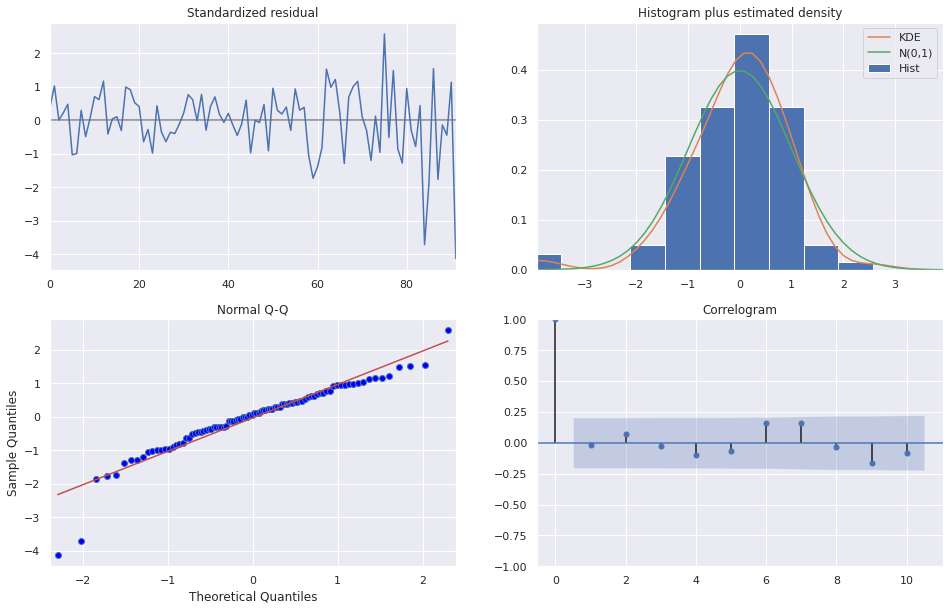

In [ ]:
smodel_eth.plot_diagnostics(figsize=(16,10))
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


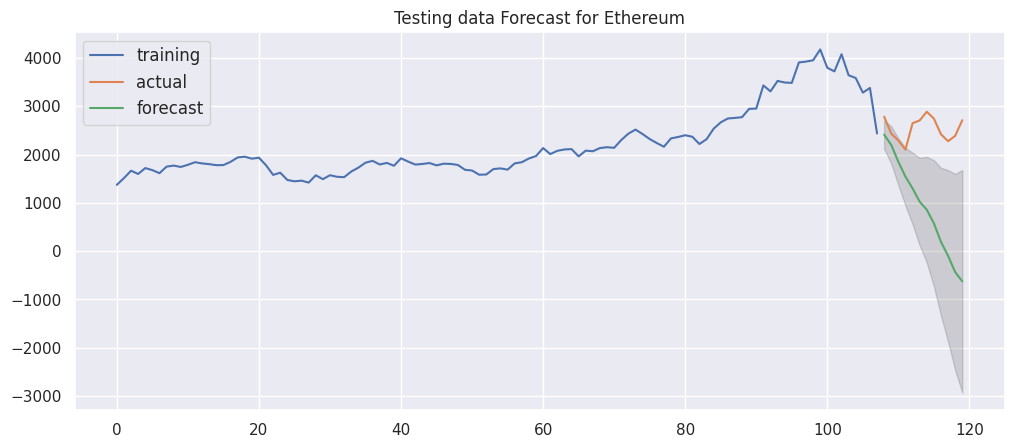

In [ ]:
smodel_eth=SARIMAX(train_fc_eth,order=(1,2,2),seasonal_order=(0,1,2,14))
fitted_smodel_eth=smodel_eth.fit(disp=-1)
fc_eth= fitted_smodel_eth.forecast(12, alpha=0.05)  # 95% conf
con1=fitted_smodel_eth.get_forecast(12).summary_frame()
# Make as pandas series
fc_series_eth = pd.Series(fc_eth, index=test_fc_eth.index)
lower_series = pd.Series(con1['mean_ci_lower'])
upper_series = pd.Series(con1['mean_ci_upper'])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_fc_eth, label='training')
plt.plot(test_fc_eth, label='actual')
plt.plot(fc_series_eth, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Testing data Forecast for Ethereum')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
fc_series_eth=pd.DataFrame(fc_series_eth)
fc_series_eth.reset_index(inplace=True)
fc_series_eth.drop(columns=['index'],inplace=True)

In [ ]:
testing2_eth=test_fc_eth.reset_index()
testing2_eth.drop(columns=['index'],inplace=True)

result2_eth=pd.DataFrame(fc_series_eth)
result2_eth['Actual']=testing2_eth['Price']
result2_eth.columns=[['Forecasted','Actual']]
result2_eth

,Forecasted,Actual
0,2411.161712,2782.00
1,2197.287629,2433.20
2,1848.982112,2289.94
3,1541.577593,2101.89
4,1297.994801,2647.35
5,1023.712272,2705.20
6,856.969481,2885.06
7,576.370867,2743.08
8,192.202648,2418.02
9,-97.510580,2275.00


In [ ]:
forecast_accuracy(fc_eth, test_fc_eth.Price)

{'corr': -0.004790085567279827,
 'mae': 1632.2327495565517,
 'mape': 0.6407409550527711,
 'rmse': 1910.7791974013576}

Hasil forecast SARIMA terhadap data test memiliki mape 64%

Forecasting harga ETH Coin pada 1-7 Juni 2021 dengan model SARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


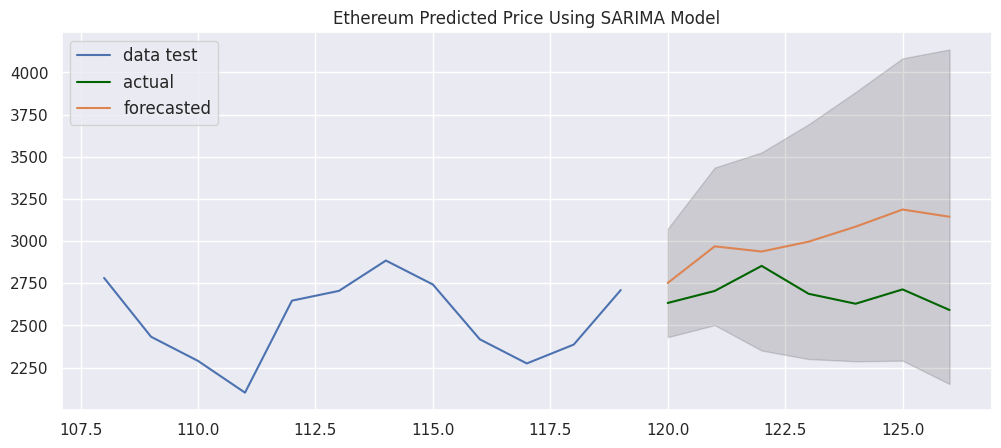

In [ ]:
# Forecast
smodel_eth=SARIMAX(data2_eth['Price'],order=(1,2,2),seasonal_order=(0,1,2,14))
fitted2_eth = smodel_eth.fit(disp=-1)  
fcs_eth= fitted2_eth.forecast(7,alpha=0.05)  # 95% conf
con=fitted2_eth.get_forecast(7).summary_frame()

# make series for plotting purpose

fitted_series_eth = pd.Series(fcs_eth[:], index=np.arange(120, 127))
lower_series = pd.Series(con['mean_ci_lower'],index=np.arange(120, 127))
upper_series = pd.Series(con['mean_ci_upper'],index=np.arange(120, 127))

# Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(test_fc_eth,label='data test')
plt.plot(actual_ETH.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
plt.plot(fitted_series_eth, label='forecasted')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.legend(loc='upper left', fontsize=12)
plt.title("Ethereum Predicted Price Using SARIMA Model")
plt.show()

In [ ]:
#harga 7 hari kedepan
result3_eth=pd.DataFrame(fcs_eth)
result3_eth.set_index(np.arange(121,128),inplace=True)

In [ ]:
actual_ETH['forecasted_SARIMA']=result3_eth['predicted_mean']
actual_ETH

,Date,Price,forecast_ARIMA,forecasted_SARIMA
121,2021-06-01,2633.59,2688.239766,2752.286992
122,2021-06-02,2704.73,2764.267266,2969.189040
123,2021-06-03,2853.36,2762.675488,2938.644670
124,2021-06-04,2687.89,2788.162566,2996.981053
125,2021-06-05,2629.00,2795.898908,3085.915824
126,2021-06-06,2713.91,2810.713156,3187.605184
127,2021-06-07,2591.78,2821.374303,3144.633018


In [ ]:
SARIMA_ETH=forecast_accuracy(fcs_eth, actual_ETH.Price)
SARIMA_ETH

{'corr': -0.14998261058006204,
 'mae': 350.0814649093957,
 'mape': 0.13058609311558034,
 'rmse': 375.04586874965366}

MAPE hasil forecast sarima terhadap harga eth 7 hari kedepan adalah 13%

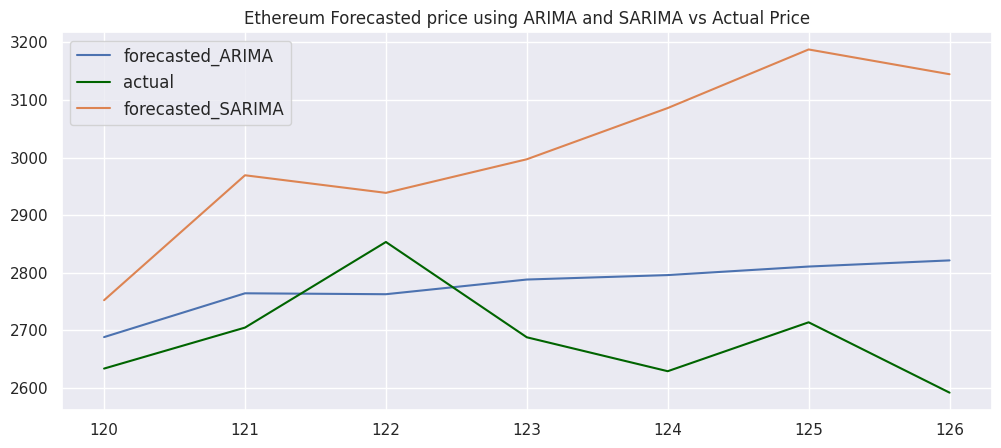

In [ ]:
# Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(pd.DataFrame(fc_series_ar_eth).set_index(np.arange(120,127)),label='forecasted_ARIMA')
plt.plot(actual_ETH.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
plt.plot(fitted_series_eth, label='forecasted_SARIMA')

plt.legend(loc='upper left', fontsize=12)
plt.title("Ethereum Forecasted price using ARIMA and SARIMA vs Actual Price")
plt.show()

ARIMA model has better performance than SARIMA model for Ethereum price forecast

##**DOGE**

In [ ]:
data_doge=pd.read_csv('DOGE_USD Binance Historical Data.csv')
data_doge.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 31, 2021",0.32550,0.30126,0.32550,0.29611,1.90B,7.84%
1,"May 30, 2021",0.30185,0.30201,0.30766,0.28922,1.51B,-0.32%
2,"May 29, 2021",0.30283,0.31063,0.31612,0.28557,2.02B,-2.73%
3,"May 28, 2021",0.31134,0.33267,0.33541,0.30668,2.62B,-6.54%
4,"May 27, 2021",0.33314,0.35295,0.35295,0.32999,1.79B,-5.60%


In [ ]:
data_doge=data_doge[['Date','Price']]
data_doge['Date']=pd.to_datetime(data_doge['Date'])
data_doge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    120 non-null    datetime64[ns]
 1   Price   120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [ ]:
data_doge.sort_values(by='Date',ascending=True,inplace=True,ignore_index=True)
data_doge.head()

,Date,Price
0,2021-02-01,0.034694
1,2021-02-02,0.031347
2,2021-02-03,0.037356
3,2021-02-04,0.052930
4,2021-02-05,0.046802


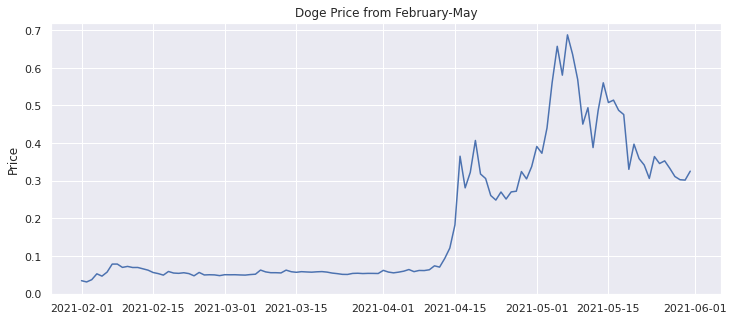

In [ ]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(12,5))
plt.title('Doge Price from February-May')
plt.ylabel('Price')
plt.plot(data_doge['Date'],data_doge['Price'])

In [ ]:
data2_doge=data_doge.copy()
data2_doge.head()

,Date,Price
0,2021-02-01,0.034694
1,2021-02-02,0.031347
2,2021-02-03,0.037356
3,2021-02-04,0.052930
4,2021-02-05,0.046802


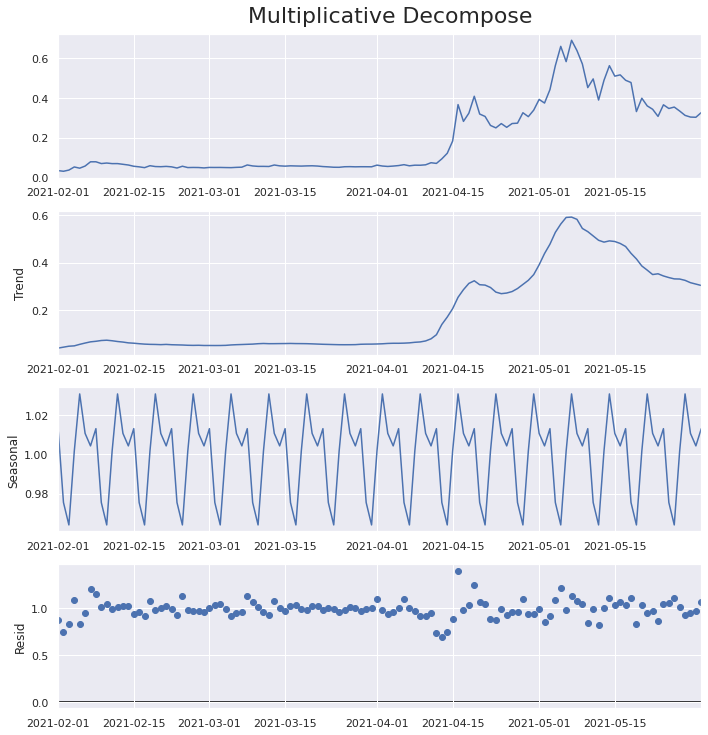

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition 
result_mul = seasonal_decompose(data2_doge.set_index(['Date']), model='multiplicative', extrapolate_trend='freq')
# Additive Decomposition

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22, x=0.55,y=1.02)
plt.show()

In [ ]:
multi = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
multi.columns = ['seas', 'trend', 'resid', 'actual_values']
multi.head()

,seas,trend,resid,actual_values
Date,,,,
2021-02-01,1.013063,0.039001,0.878097,0.034694
2021-02-02,0.975486,0.042976,0.747737,0.031347
2021-02-03,0.964089,0.046951,0.825273,0.037356
2021-02-04,1.001679,0.048480,1.089957,0.052930
2021-02-05,1.030735,0.054786,0.828794,0.046802


In [ ]:
multi.describe()

,seas,trend,resid,actual_values
count,120.000000,120.000000,120.000000,120.000000
mean,1.000109,0.188194,0.989997,0.188264
std,0.021215,0.173729,0.098575,0.179258
min,0.964089,0.039001,0.691037,0.031347
25%,0.975486,0.055075,0.944726,0.054801
50%,1.004295,0.063946,0.991658,0.063297
75%,1.013063,0.323434,1.034235,0.324750
max,1.030735,0.591570,1.398628,0.687560


In [ ]:
result = adfuller(data2_doge.Price)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.961769
p-value: 0.766952


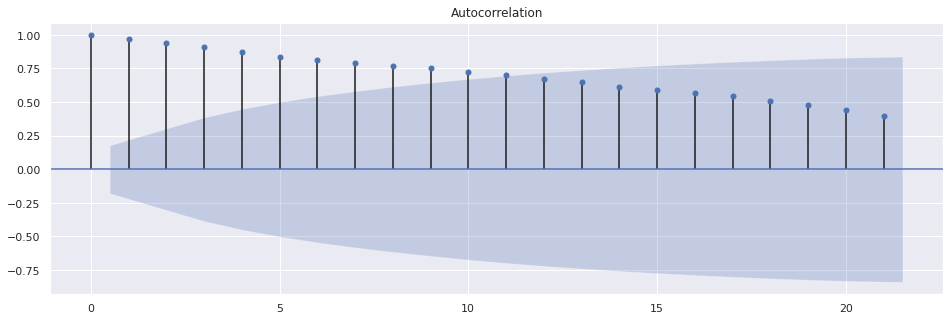

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
ax.set_title('ACF before differencing')
plot_acf(data2_doge.Price,ax=ax)
plt.show()

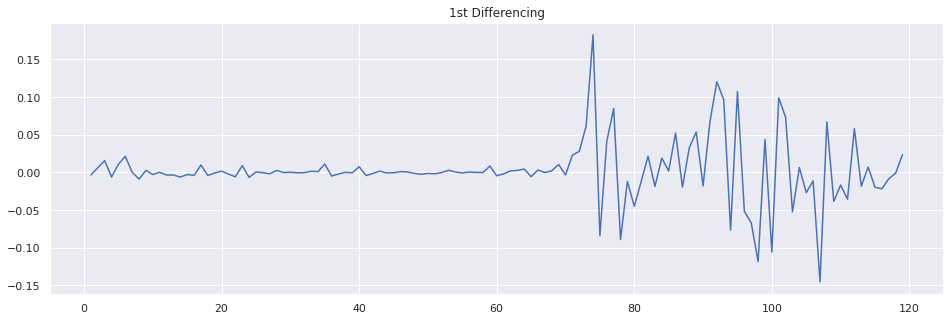

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(data2_doge.Price.diff())
ax.set_title('1st Differencing')
plt.show()

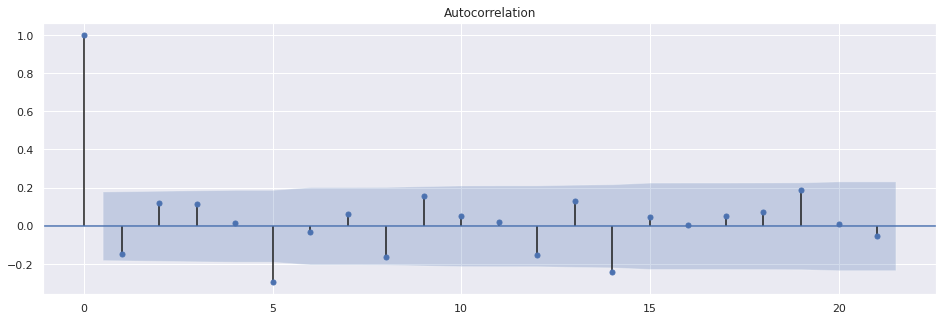

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
plot_acf(data2_doge.Price.diff().dropna(), ax=ax)
plt.show()

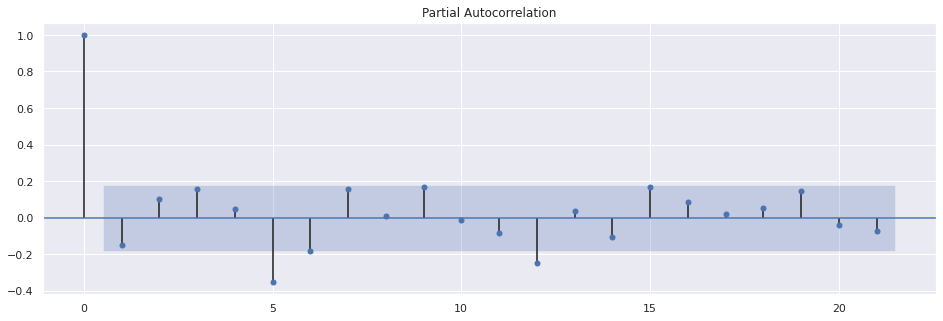

In [ ]:
fig,ax=plt.subplots(figsize=(16,5))
plot_pacf(data2_doge.Price.diff().dropna(),ax=ax)
plt.show()

In [ ]:
result2 = adfuller(data2_doge.Price.diff().dropna())
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])

ADF Statistic: -3.683994
p-value: 0.004344


In [ ]:
import random
sample1=[]
sample2=[]
sample3=[]
for i in range(30):
  sample1.append(random.sample(list(data2_doge.Price.diff().dropna()),10))
  sample2.append(random.sample(list(data2_doge.Price.diff().dropna()),10))
  sample3.append(random.sample(list(data2_doge.Price.diff().dropna()),10))

In [ ]:
from scipy.stats import bartlett
result=0
for i in range(30):
  result+=bartlett(sample1[i],sample2[i],sample3[i])[1]
result/30

0.15690922715982447

Karena lebih besar dari p value(0.05) maka data sudah stasioner varians

### Pembentukan Model

Tentative model ARIMA nya adalah ARIMA(0,1,0)

In [ ]:
train_fc_doge=pd.DataFrame(data2_doge.Price[:108])
test_fc_doge=pd.DataFrame(data2_doge.Price[108:])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_doge = pm.auto_arima(train_fc_doge.Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-363.845, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-367.782, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-366.703, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-366.527, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-369.332, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.455 seconds


In [ ]:
print(model_doge.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 185.666
Date:                Fri, 20 Aug 2021   AIC                           -369.332
Time:                        11:11:34   BIC                           -366.659
Sample:                             0   HQIC                          -368.249
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0018      0.000     13.378      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                98.05
Prob(Q):                              0.36   Pr

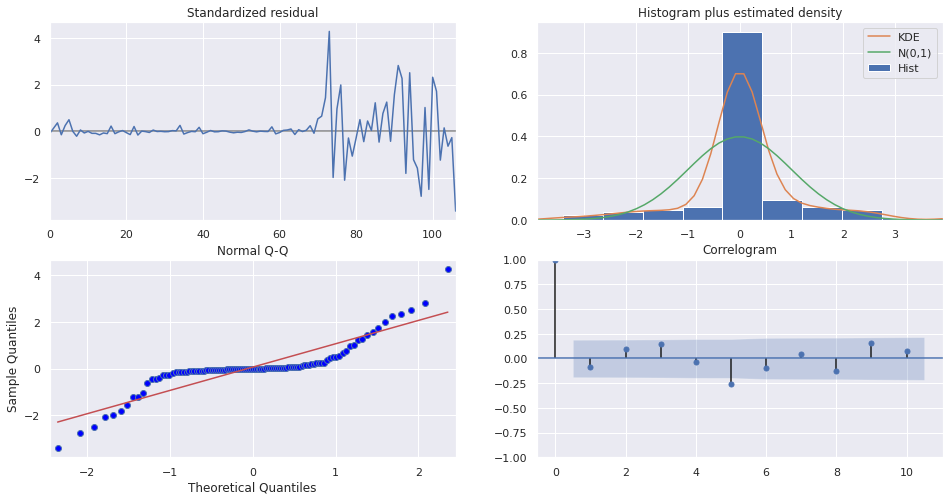

In [ ]:
model_doge.plot_diagnostics(figsize=(16,8))
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


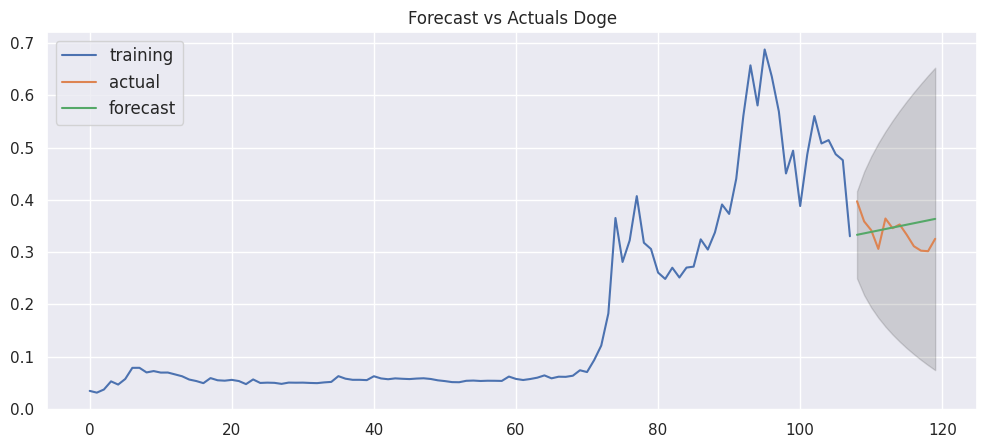

In [ ]:
bestmodel_doge = ARIMA(train_fc_doge, order=(0, 1, 0))  
fitted_doge = bestmodel_doge.fit(disp=-1)  

# Forecast
fc_doge, se, conf = fitted_doge.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_doge = pd.Series(fc_doge, index=test_fc_doge.index)
lower_series = pd.Series(conf[:, 0], index=test_fc_doge.index)
upper_series = pd.Series(conf[:, 1], index=test_fc_doge.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_fc_doge, label='training')
plt.plot(test_fc_doge, label='actual')
plt.plot(fc_series_doge, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals Doge')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
testing_doge=test_fc_doge.reset_index()
testing_doge.drop(columns=['index'],inplace=True)

In [ ]:
result1_doge=pd.DataFrame(fc_doge,columns=['Predicted'])
result1_doge['Actual']=testing_doge['Price']
result1_doge

,Predicted,Actual
0,0.333164,0.39728
1,0.335927,0.35880
2,0.338691,0.34192
3,0.341454,0.30622
4,0.344218,0.36433
5,0.346982,0.34585
6,0.349745,0.35292
7,0.352509,0.33314
8,0.355272,0.31134
9,0.358036,0.30283


In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape,'mae': mae, 
             'rmse':rmse, 
            'corr':corr})

In [ ]:
forecast_accuracy(fc_doge, test_fc_doge.Price)

{'corr': -0.7070442149811446,
 'mae': 0.030449290281472644,
 'mape': 0.09257453686673321,
 'rmse': 0.03716923065433406}

Mape best model hasil forecast terhadap data test adalah 9%

In [ ]:
actual_DOGE=pd.read_csv('DOGE_Actual.csv')
actual_DOGE=actual_DOGE[['Date','Price']]
actual_DOGE['Date']=pd.to_datetime(actual_DOGE['Date'])
actual_DOGE.sort_values(by='Date',ascending=True,ignore_index=True,inplace=True)
actual_DOGE.set_index(np.arange(121,128),inplace=True)
actual_DOGE.head()

,Date,Price
121,2021-06-01,0.37008
122,2021-06-02,0.42348
123,2021-06-03,0.40069
124,2021-06-04,0.37636
125,2021-06-05,0.37181


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


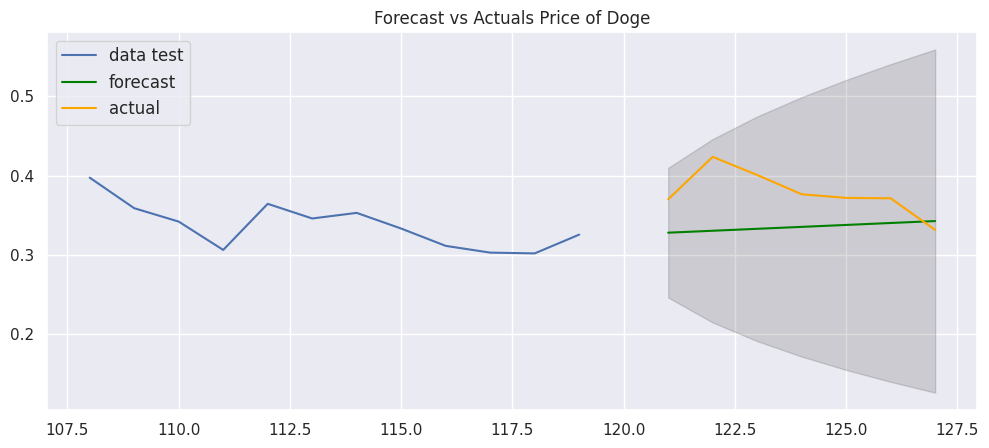

In [ ]:
bestmodel_doge = ARIMA(data2_doge['Price'], order=(0, 1, 0))  
fitted_doge = bestmodel_doge.fit(disp=-1)  

# Forecast
fc_doge, se, conf = fitted_doge.forecast(7, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_ar_doge = pd.Series(fc_doge, index=np.arange(121, 128))
lower_series = pd.Series(conf[:, 0], index=np.arange(121, 128))
upper_series = pd.Series(conf[:, 1], index=np.arange(121, 128))

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_fc_doge, label='data test')
plt.plot(fc_series_ar_doge, label='forecast',color='green')
plt.plot(actual_DOGE['Price'],label='actual',color='orange')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals Price of Doge')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
actual_DOGE['forecast_ARIMA']=fc_series_ar_doge
actual_DOGE

,Date,Price,forecast_ARIMA
121,2021-06-01,0.37008,0.327944
122,2021-06-02,0.42348,0.330387
123,2021-06-03,0.40069,0.332831
124,2021-06-04,0.37636,0.335275
125,2021-06-05,0.37181,0.337719
126,2021-06-06,0.37129,0.340162
127,2021-06-07,0.33145,0.342606


In [ ]:
ARIMA_DOGE=forecast_accuracy(fc_series_ar_doge, actual_DOGE.Price)
ARIMA_DOGE

{'corr': -0.6727224787249104,
 'mae': 0.04579250454946375,
 'mape': 0.11734120275723037,
 'rmse': 0.05208518404113464}

Mape hasil forecast ARIMA harga ETH 7 hari kedepan adalah 11.7%

### Model SARIMA

Pembentukan model SARIMA secara otomatis

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel_doge = pm.auto_arima(train_fc_doge, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=14,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[14]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=-251.090, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=-284.171, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=inf, Time=0.71 sec
 ARIMA(1,1,0)(0,1,0)[14]             : AIC=-249.136, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[14]             : AIC=-291.531, Time=1.27 sec
 ARIMA(1,1,0)(2,1,1)[14]             : AIC=-291.407, Time=3.00 sec
 ARIMA(1,1,0)(1,1,1)[14]             : AIC=-293.086, Time=1.37 sec
 ARIMA(1,1,0)(0,1,1)[14]             : AIC=inf, Time=0.94 sec
 ARIMA(1,1,0)(1,1,2)[14]             : AIC=-291.408, Time=3.07 sec
 ARIMA(1,1,0)(0,1,2)[14]             : AIC=-293.214, Time=2.03 sec
 ARIMA(0,1,0)(0,1,2)[14]             : AIC=-293.926, Time=0.93 sec
 ARIMA(0,1,0)(0,1,1)[14]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(1,1,2)[14]             : AIC=-292.039, Time=2.29 sec
 ARIMA(0,1,0)(1,1,1)[14]             : 

In [ ]:
print(smodel_doge.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 14)   Log Likelihood                 149.963
Date:                                 Fri, 20 Aug 2021   AIC                           -293.926
Time:                                         11:19:55   BIC                           -286.328
Sample:                                              0   HQIC                          -290.858
                                                 - 108                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L14      -1.0097      0.107     -9.394      0.000      -1.220      -0

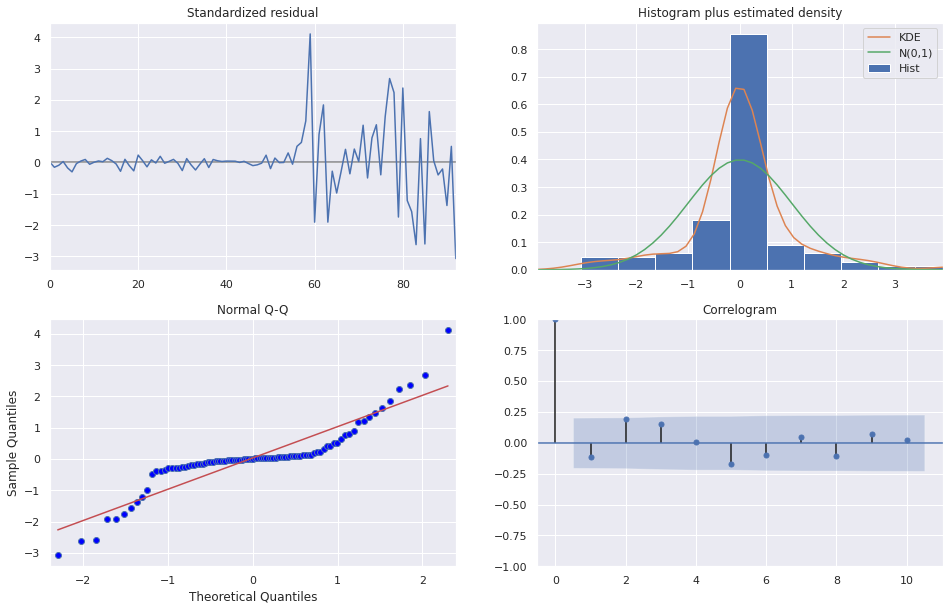

In [ ]:
smodel_doge.plot_diagnostics(figsize=(16,10))
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


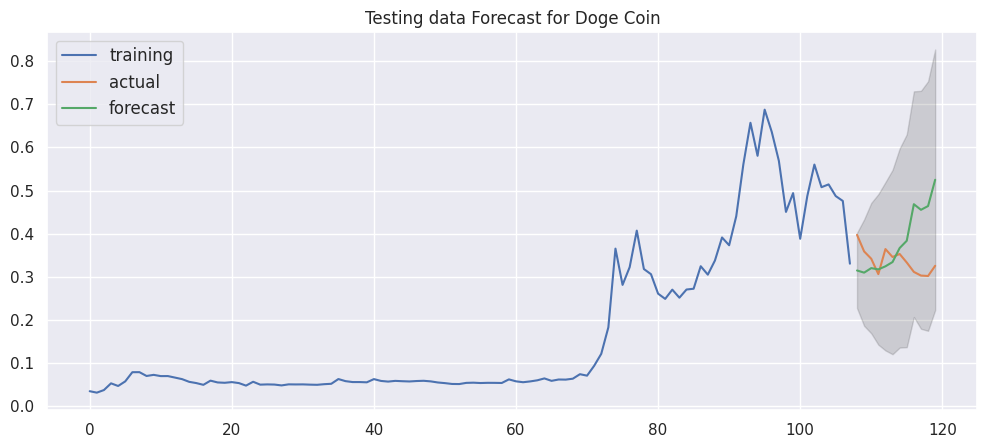

In [ ]:
smodel_doge=SARIMAX(train_fc_doge,order=(0,1,0),seasonal_order=(0,1,[1,2],14))
fitted_smodel_doge=smodel_doge.fit(disp=-1)
fc_doge= fitted_smodel_doge.forecast(12, alpha=0.05)  # 95% conf
con1=fitted_smodel_doge.get_forecast(12).summary_frame()
# Make as pandas series
fc_series_doge = pd.Series(fc_doge, index=test_fc_doge.index)
lower_series = pd.Series(con1['mean_ci_lower'])
upper_series = pd.Series(con1['mean_ci_upper'])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_fc_doge, label='training')
plt.plot(test_fc_doge, label='actual')
plt.plot(fc_series_doge, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Testing data Forecast for Doge Coin')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
fc_series_doge=pd.DataFrame(fc_series_doge)
fc_series_doge.reset_index(inplace=True)
fc_series_doge.drop(columns=['index'],inplace=True)

In [ ]:
testing2_doge=test_fc_doge.reset_index()
testing2_doge.drop(columns=['index'],inplace=True)

result2_doge=pd.DataFrame(fc_series_doge)
result2_doge['Actual']=testing2_doge['Price']
result2_doge.columns=[['Forecasted','Actual']]
result2_doge

,Forecasted,Actual
0,0.314663,0.39728
1,0.309632,0.35880
2,0.320102,0.34192
3,0.317106,0.30622
4,0.324303,0.36433
5,0.334184,0.34585
6,0.366652,0.35292
7,0.383560,0.33314
8,0.468334,0.31134
9,0.455319,0.30283


In [ ]:
forecast_accuracy(fc_doge, test_fc_doge.Price)

{'corr': -0.6323137093363017,
 'mae': 0.07929190977448249,
 'mape': 0.24468435604962066,
 'rmse': 0.10340494080599098}

Hasil forecast SARIMA terhadap data test memiliki mape 24%

Forecasting harga Doge Coin pada 1-7 Juni 2021 dengan model SARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


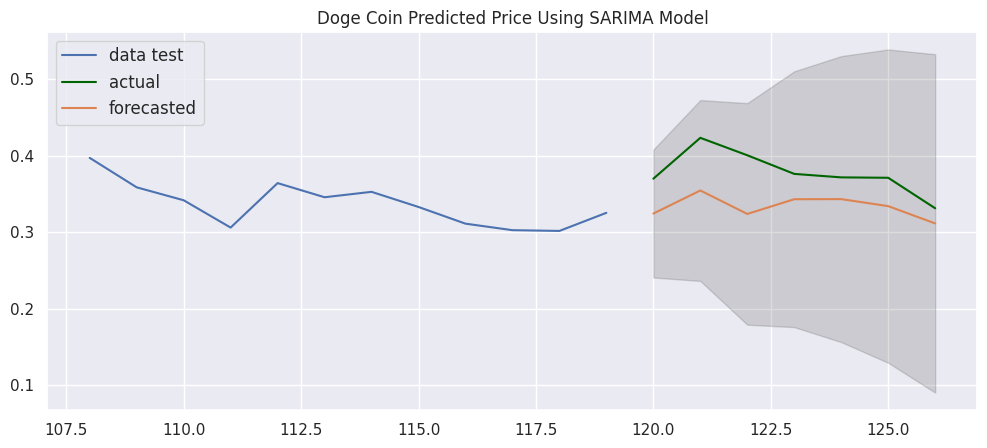

In [ ]:
# Forecast
smodel_doge=SARIMAX(data2_doge['Price'],order=(0,1,0),seasonal_order=(0,1,2,14))
fitted2_doge = smodel_doge.fit(disp=-1)  
fcs_doge= fitted2_doge.forecast(7,alpha=0.05)  # 95% conf
con=fitted2_doge.get_forecast(7).summary_frame()

# make series for plotting purpose

fitted_series_doge = pd.Series(fcs_doge[:], index=np.arange(120, 127))
lower_series = pd.Series(con['mean_ci_lower'],index=np.arange(120, 127))
upper_series = pd.Series(con['mean_ci_upper'],index=np.arange(120, 127))

# Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(test_fc_doge,label='data test')
plt.plot(actual_DOGE.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
plt.plot(fitted_series_doge, label='forecasted')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.legend(loc='upper left', fontsize=12)
plt.title("Doge Coin Predicted Price Using SARIMA Model")
plt.show()

In [ ]:
#harga 7 hari kedepan
result3_doge=pd.DataFrame(fcs_doge)
result3_doge.set_index(np.arange(121,128),inplace=True)

In [ ]:
actual_DOGE['forecasted_SARIMA']=result3_doge['predicted_mean']
actual_DOGE

,Date,Price,forecast_ARIMA,forecasted_SARIMA
121,2021-06-01,0.37008,0.327944,0.324538
122,2021-06-02,0.42348,0.330387,0.354677
123,2021-06-03,0.40069,0.332831,0.324046
124,2021-06-04,0.37636,0.335275,0.343273
125,2021-06-05,0.37181,0.337719,0.343396
126,2021-06-06,0.37129,0.340162,0.334252
127,2021-06-07,0.33145,0.342606,0.311636


In [ ]:
SARIMA_DOGE=forecast_accuracy(fcs_doge, actual_DOGE.Price)
SARIMA_DOGE

{'corr': 0.6982172522753901,
 'mae': 0.05040515365599707,
 'mape': 0.12816460913314975,
 'rmse': 0.05697519495705453}

MAPE hasil forecast sarima terhadap harga eth 7 hari kedepan adalah 12.8%

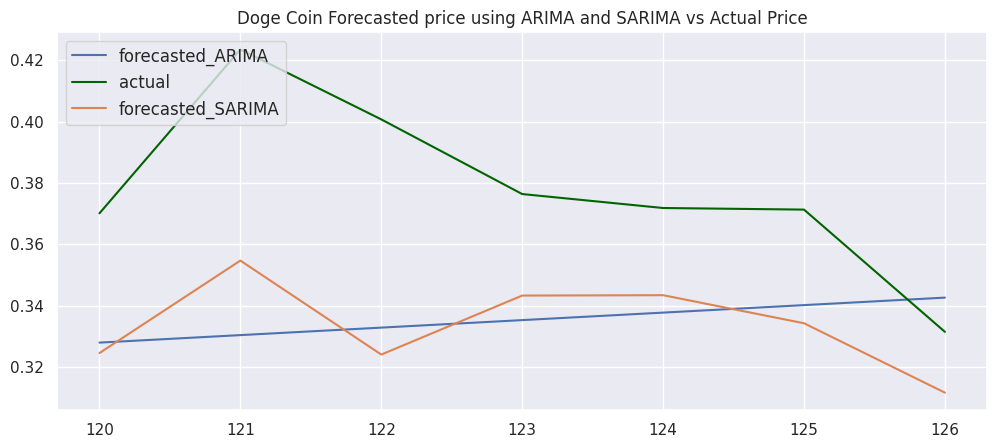

In [ ]:
# Plot
plt.figure(figsize=(12,5),dpi=100)
plt.plot(pd.DataFrame(fc_series_ar_doge).set_index(np.arange(120,127)),label='forecasted_ARIMA')
plt.plot(actual_DOGE.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
plt.plot(fitted_series_doge, label='forecasted_SARIMA')

plt.legend(loc='upper left', fontsize=12)
plt.title("Doge Coin Forecasted price using ARIMA and SARIMA vs Actual Price")
plt.show()

ARIMA model has better performance than SARIMA model for Doge price forecast

## Conclusion

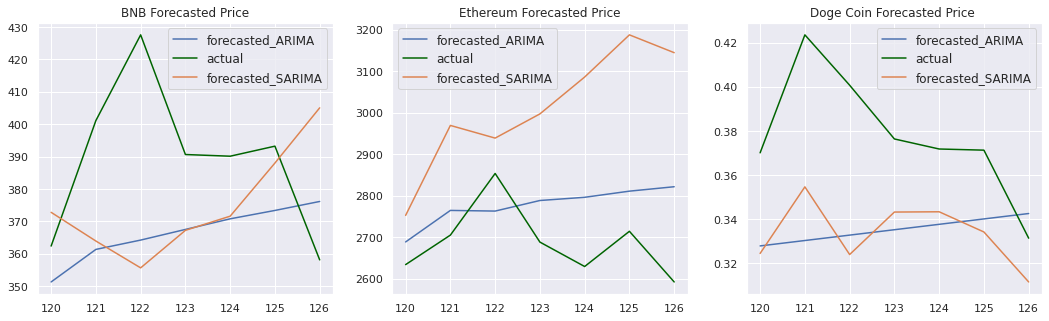

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(18,5))

#BNB
axes[0].plot(pd.DataFrame(fc_series_ar).set_index(np.arange(120,127)),label='forecasted_ARIMA')
axes[0].plot(actual_BNB.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
axes[0].plot(fitted_series, label='forecasted_SARIMA')

axes[0].legend(loc='upper right', fontsize=12)
axes[0].set_title("BNB Forecasted Price")

#ETH  
axes[1].plot(pd.DataFrame(fc_series_ar_eth).set_index(np.arange(120,127)),label='forecasted_ARIMA')
axes[1].plot(actual_ETH.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
axes[1].plot(fitted_series_eth, label='forecasted_SARIMA')
axes[1].legend(loc='upper left', fontsize=12)
axes[1].set_title("Ethereum Forecasted Price")

#DOGE
axes[2].plot(pd.DataFrame(fc_series_ar_doge).set_index(np.arange(120,127)),label='forecasted_ARIMA')
axes[2].plot(actual_DOGE.set_index(np.arange(120,127))['Price'],label='actual',color='darkgreen')
axes[2].plot(fitted_series_doge, label='forecasted_SARIMA')
axes[2].legend(loc='upper right', fontsize=12)
axes[2].set_title("Doge Coin Forecasted Price ");

In [ ]:
ARIMA_MAPE=[ARIMA_BNB['mape'],ARIMA_ETH['mape'],ARIMA_DOGE['mape']]
SARIMA_MAPE=[SARIMA_BNB['mape'],SARIMA_ETH['mape'],SARIMA_DOGE['mape']]
matrix=pd.DataFrame(({'ARIMA_MAPE':ARIMA_MAPE,'SARIMA_MAPE':SARIMA_MAPE}),index=['BNB','ETHEREUM','DOGE'])
matrix

,ARIMA_MAPE,SARIMA_MAPE
BNB,0.069619,0.057153
ETHEREUM,0.042798,0.130586
DOGE,0.117341,0.128165


Based on MAPE score, for BNB price forecasting, SARIMA gives better performance than SARIMA, but for ETHEREUM and DOGE price forecasting, ARIMA gives better performance than SARIMA 